In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo

%matplotlib inline

In [36]:
calibration = pd.read_csv("CalibrationOfCoilsXYZinAODSetup.dat", sep="\t",index_col=0)

In [37]:
calibration = calibration["FieldZ(Freq=0Hz)mT"]

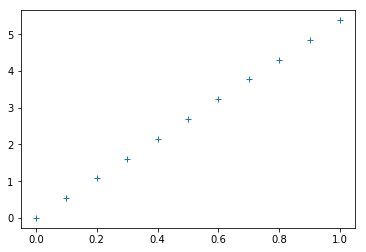

In [38]:
plt.plot(calibration,'+')

In [43]:
calibration.head()

Voltage
0.0    0.00
0.1    0.54
0.2    1.08
0.3    1.61
0.4    2.15
Name: FieldZ(Freq=0Hz)mT, dtype: float64

In [45]:
linear = lambda x,a: a*x
cal_curve = spo.curve_fit(linear, calibration.index.values, calibration.values)

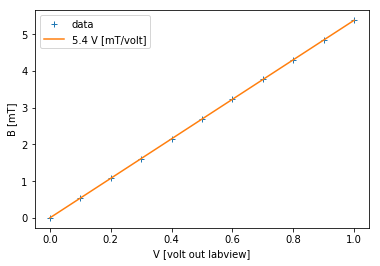

In [54]:
x = np.linspace(0,1,100)

plt.plot(calibration,'+')
plt.plot(x,cal_curve[0][0]*x)
plt.ylabel("B [mT]")
plt.xlabel("V [volt out labview]")
plt.legend(["data","%2.2g V [mT/volt]"%cal_curve[0][0]])

In [51]:
used_volts = np.array([0.05,0.1,0.15])
used_volts*cal_curve[0][0]

array([ 0.26907792,  0.53815584,  0.80723377])

# Interaction Strength

In [55]:
import pint

In [56]:
ureg = pint.UnitRegistry()

The magntiude of the dipole moment is:

$$m = \frac{B\chi V}{\mu_0}$$

In [120]:
chi = 0.4
rho = 1.4 * ureg.um
mu0 = 4e-7*np.pi* ureg.N/ureg.A**2

cal = cal_curve[0][0] * (ureg.mT/ureg.volts)
used_volts = np.array([0.05,0.1,0.15]) * ureg.volts
used_fields= used_volts*cal
print(used_fields)

V = 4/3*np.pi*rho**3

[ 0.26907792  0.53815584  0.80723377] millitesla


In [121]:
m = (V*used_fields*chi/mu0)
print(m.to_base_units())

[  9.84466424e-16   1.96893285e-15   2.95339927e-15] ampere * meter ** 2


The interaction energy between two parallel dipoles is:

$$U(r) = m^2\frac{\mu_0}{4\pi}\frac{1}{r^3} \textrm{N m}$$

This can be written as:
$$U\left(\frac{r}{d}\right) = m^2\frac{\mu_0}{4\pi d^3}\left(\frac{r}{d}\right)^{-3} \mathrm{N m}$$

In [122]:
print((m**2*mu0/(4*np.pi)/rho**3).to_base_units())

[  3.53197573e-20   1.41279029e-19   3.17877816e-19] kilogram * meter ** 2 / second ** 2


In [123]:
Kb = 1.38064852e-23*ureg.J/ureg.K
T = 300*ureg.K
KbT = (Kb*T).to(ureg.pN*ureg.nm)
KbT

<Quantity(4.141945559999999, 'nanometer * piconewton')>

In [124]:
print(((m**2*mu0/(4*np.pi)/(2*rho)**3)/KbT).to_base_units())

[ 1.06591687  4.2636675   9.59325187] dimensionless
